In [2]:
import seaborn as sns 
import numpy as np

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-deep')
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (12, 8)


In [4]:
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.base as skb
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import sklearn.linear_model as sklm
import random
seed = 12
np.random.seed(seed)

from datetime import date
import os
import cv2
import glob

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train = pd.read_csv("/content/drive/MyDrive/Hack3/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Hack3/test.csv")

In [7]:
#Checking For Null Values if any Present
train.isnull().sum()

Deal_title                 0
Lead_name                  0
Industry                   1
Deal_value                51
Weighted_amount          525
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Fund_category              0
Geography                972
Location                  11
POC_name                   8
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Last_lead_update         633
Internal_POC               0
Resource                 149
Internal_rating            0
Success_probability        0
dtype: int64

In [8]:
#removing extra special characters from columns for performing operations and coverting object to int or float according to convienence
train['Deal_value'] = train['Deal_value'].str.replace('$', '')
train['Weighted_amount'] = train['Weighted_amount'].str.replace('$', '')
train['Deal_value']=train['Deal_value'].astype('float')
train['Weighted_amount']=train['Weighted_amount'].astype('float')
train.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506.0,2067263.7,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488.0,240876.8,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392.0,2407926.4,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774.0,468321.4,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896.0,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [9]:
#filling  Numerical null values by mean
train['Deal_value'] = train['Deal_value'].fillna((train['Deal_value'].mean()))
train['Weighted_amount'] = train['Weighted_amount'].fillna((train['Weighted_amount'].mean()))
train['Internal_rating'] = train['Internal_rating'].fillna((train['Internal_rating'].mean()))
train['Success_probability'] = train['Success_probability'].fillna((train['Success_probability'].mean()))
train.head()
#filling non numerical null values by most occuring one
df_most_common_imputed = train.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_most_common_imputed


,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506.0,2.067264e+06,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",No,3,73.60
1,TitleKIW18,Bender PLC LLC,Construction Services,39488.0,2.408768e+05,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.90
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392.0,2.407926e+06,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.80
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774.0,4.683214e+05,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.50
4,Title904GV,Lee and Sons PLC,Financial Services,483896.0,1.569884e+06,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7002,TitleJ7TDY,Flowers-Adams PLC,Banks,192800.0,1.195360e+06,2020-12-07,Product_1,1734434912,100 - 500 Million,Category 4,USA,Kagaznagar,smt. chanchala,CEO/Co-Founder/Chairman,clairewilliams@flowersadams.com,Call centre manager,Contact Email,Level 1,More than a week back,"Jones,Eyvette W",We have all the requirements,4,107.34
7003,TitleO1IIN,"Kelly, Smith and Benton and Sons",Hospitals/Clinics,220208.0,1.453373e+06,2020-03-13,Product_2,(002)106-0243x03346,100 - 500 Million,Category 1,USA,Proddatur,geeta @ komal,CEO,vanessaanderson@kelly.com,Financial risk analyst,Marketing Event,Level 2,?,"Brown,Maxine A",We have all the requirements,3,26.35
7004,TitleF1FWY,Romero-Juarez PLC,Semiconductors,253608.0,1.569884e+06,2020-03-10,Product_1,777-231-4109x712,100 - 500 Million,Category 2,USA,"Rocky Mount, NC",Nicholas Duncan,SVP/General Counsel,nicholasduncan@romerojuarez.com,Nature conservation officer,Marketing Event,Level 3,Following up but lead not responding,"Logan,Kevin N",No,1,70.60
7005,TitleXVBNJ,"Sullivan, Mooney and Elliott LLC",Banks,118615.0,7.947205e+05,2019-12-26,Product_1,001-212-631-5467x377,500 Million - 1 Billion,Category 2,USA,"Atlanta-Sandy Springs-Roswell, GA",Wayne Williams,Executive Vice President,waynewilliams@sullivan.com,"Designer, textile",Website,Level 3,Following up but lead not responding,"Cashin,Marc C",We have all the requirements,3,-5.00


In [10]:
#encoding object data type to which it can be fitted to model
import pandas as pd
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df_most_common_imputed.columns:
    if df_most_common_imputed[column_name].dtype == object:
        df_most_common_imputed[column_name] = le.fit_transform(df_most_common_imputed[column_name])
    else:
        pass

In [11]:
df_most_common_imputed.head(5)

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,4326,1386,119,320506.0,2.067264e+06,453,1,5706,1,1,1,292,568,7,1132,126,3,2,7,12,2,3,73.6
1,3979,411,31,39488.0,2.408768e+05,190,1,6624,2,3,0,457,4528,4,6500,501,2,0,3,5,2,5,58.9
2,3081,940,56,359392.0,2.407926e+06,207,0,5490,2,3,1,15,272,8,552,286,1,0,2,18,2,4,68.8
3,4966,1943,114,76774.0,4.683214e+05,760,1,1007,2,2,1,372,1170,2,2282,611,0,1,3,5,4,1,64.5
4,1739,3477,46,483896.0,1.569884e+06,141,1,3604,1,2,0,505,3962,7,5082,369,3,1,9,53,2,4,62.4


In [12]:
corrmat = df_most_common_imputed.corr()
print("Top 10 highly correlated features with SalesPrice")
top12=corrmat.sort_values(by='Success_probability',ascending=False).head(1).transpose().sort_values(by='Success_probability',ascending=False).head(40)
top12

Top 10 highly correlated features with SalesPrice


,Success_probability
Success_probability,1.000000
Geography,0.149783
Level_of_meeting,0.095374
Internal_rating,0.073845
Lead_source,0.052177
Weighted_amount,0.035367
Lead_name,0.019925
Deal_value,0.019654
Lead_revenue,0.015269
Internal_POC,0.010641


In [13]:
#drop other columns other than top 5-6 selected
df_most_common_imputed.drop(["Deal_title","Lead_name","Date_of_creation","Designation","Pitch","Industry","Deal_value","Contact_no","Location","POC_name","Lead_POC_email","Lead_revenue","Resource","Hiring_candidate_role","Last_lead_update","Internal_POC"], axis=1, inplace=True)

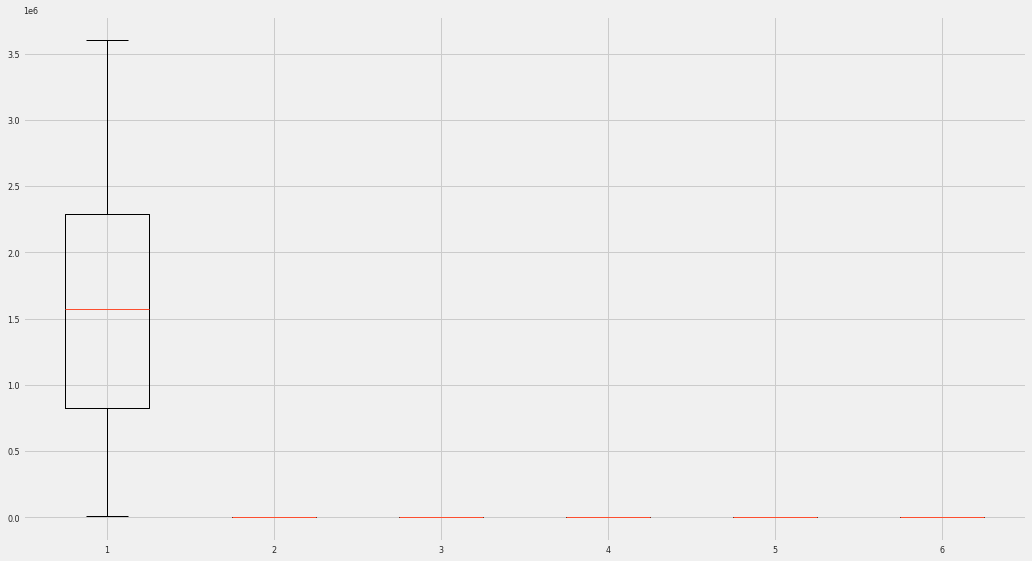

In [14]:
#BOXPLOT FOR OUTLIAR DETECTION ON TRAINING DATA
a=df_most_common_imputed['Weighted_amount']
b=df_most_common_imputed['Fund_category']
c=df_most_common_imputed['Geography']
d=df_most_common_imputed['Lead_source']
e=df_most_common_imputed['Level_of_meeting']
f=df_most_common_imputed['Internal_rating']
to_plot=[a,b,c,d,e,f]
fig=plt.figure(1,figsize=(16,9))
ax=fig.add_subplot(111)
bp=ax.boxplot(to_plot)

In [15]:
#removing Outliars from training data
df_most_common_imputed
import pandas as pd
from scipy import stats
z_scores = stats.zscore(df_most_common_imputed)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df_most_common_imputed[filtered_entries]
new_df


,Weighted_amount,Fund_category,Geography,Lead_source,Level_of_meeting,Internal_rating,Success_probability
0,2.067264e+06,1,1,3,2,3,73.60
1,2.408768e+05,3,0,2,0,5,58.90
2,2.407926e+06,3,1,1,0,4,68.80
3,4.683214e+05,2,1,0,1,1,64.50
4,1.569884e+06,2,0,3,1,4,62.40
...,...,...,...,...,...,...,...
7001,2.685430e+06,2,0,2,1,2,57.40
7002,1.195360e+06,3,1,0,0,4,107.34
7003,1.453373e+06,0,1,1,1,3,26.35
7004,1.569884e+06,1,1,1,2,1,70.60


In [16]:
#removing extra special characters from columns for performing operations and coverting object to int or float according to convienence
test['Deal_value'] = test['Deal_value'].str.replace('$', '')
test['Weighted_amount'] = test['Weighted_amount'].str.replace('$', '')
test['Deal_value']=test['Deal_value'].astype('float')
test['Weighted_amount']=test['Weighted_amount'].astype('float')
test.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,TitleAD16O,Bonilla Ltd Inc,Investment Bank/Brokerage,200988.0,NaN,2020-04-15,Product_1,167.332.2751x989,100 - 500 Million,Category 4,India,Bhubaneshwar,sonia,Chairman/CEO/President,maureenthomas@bonilla.com,"Designer, fashion/clothing",Marketing Event,Level 1,more than a month,"Massiah,Gerard F",No,-1.0
1,TitleOW6CR,"Williams, Rogers and Roach PLC",Electronics,409961.0,2541758.20,2021-01-23,Product_1,001-486-903-0711x7831,100 - 500 Million,Category 3,USA,"Coeur d'Alene, ID",Daniel Bell,CEO/Co-Founder/Chairman,danielbell@williams.com,Horticultural consultant,Marketing Event,Level 2,Up-to-date,"Smith,Keenan H",Yes,1.0
2,TitleVVJQ5,"Wood, Vaughn and Morales Ltd",Banks,434433.0,3041031.00,2020-07-19,Product_1,(393)104-2610x9723,100 - 500 Million,Category 1,USA,"Portland-South Portland, ME",Andrew Davis,Chairman/Chief Innovation Officer,andrewdavis@wood.com,Information officer,Marketing Event,Level 2,Did not hear back after Level 1,"Gilley,Janine",Deliverable,5.0
3,TitleUS8NA,Durham-Crawford Inc,Music,218952.0,1521716.40,2020-02-27,Product_2,(817)040-4599,100 - 500 Million,Category 1,India,Bareilly,shital,CEO/Chairman/President,charlesrivera@durhamcrawford.com,Commercial/residential surveyor,Contact Email,Level 3,more than a month,"Morsy,Omar A",No,5.0
4,Title5VGWW,"Simpson, Duncan and Long LLC",Real Estate,392835.0,2455218.75,2020-10-25,Product_1,718-032-5726x76098,500 Million - 1 Billion,Category 3,USA,"Trenton, NJ",Shelly Stephenson,CEO/Co-Founder/Chairman,shellystephenson@simpson.com,Wellsite geologist,Others,Level 3,More than 2 weeks,"Morsy,Omar A",Deliverable,2.0


In [17]:
#filling  Numerical null values by mean
test['Deal_value'] = test['Deal_value'].fillna((test['Deal_value'].mean()))
test['Weighted_amount'] = test['Weighted_amount'].fillna((test['Weighted_amount'].mean()))
test['Internal_rating'] = test['Internal_rating'].fillna((test['Internal_rating'].mean()))
test.head()
#filling non numerical null values by most occuring one
dt_most_common_imputed = test.apply(lambda x: x.fillna(x.value_counts().index[0]))
dt_most_common_imputed

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,TitleAD16O,Bonilla Ltd Inc,Investment Bank/Brokerage,200988.0,1.556917e+06,2020-04-15,Product_1,167.332.2751x989,100 - 500 Million,Category 4,India,Bhubaneshwar,sonia,Chairman/CEO/President,maureenthomas@bonilla.com,"Designer, fashion/clothing",Marketing Event,Level 1,more than a month,"Massiah,Gerard F",No,-1.0
1,TitleOW6CR,"Williams, Rogers and Roach PLC",Electronics,409961.0,2.541758e+06,2021-01-23,Product_1,001-486-903-0711x7831,100 - 500 Million,Category 3,USA,"Coeur d'Alene, ID",Daniel Bell,CEO/Co-Founder/Chairman,danielbell@williams.com,Horticultural consultant,Marketing Event,Level 2,Up-to-date,"Smith,Keenan H",Yes,1.0
2,TitleVVJQ5,"Wood, Vaughn and Morales Ltd",Banks,434433.0,3.041031e+06,2020-07-19,Product_1,(393)104-2610x9723,100 - 500 Million,Category 1,USA,"Portland-South Portland, ME",Andrew Davis,Chairman/Chief Innovation Officer,andrewdavis@wood.com,Information officer,Marketing Event,Level 2,Did not hear back after Level 1,"Gilley,Janine",Deliverable,5.0
3,TitleUS8NA,Durham-Crawford Inc,Music,218952.0,1.521716e+06,2020-02-27,Product_2,(817)040-4599,100 - 500 Million,Category 1,India,Bareilly,shital,CEO/Chairman/President,charlesrivera@durhamcrawford.com,Commercial/residential surveyor,Contact Email,Level 3,more than a month,"Morsy,Omar A",No,5.0
4,Title5VGWW,"Simpson, Duncan and Long LLC",Real Estate,392835.0,2.455219e+06,2020-10-25,Product_1,718-032-5726x76098,500 Million - 1 Billion,Category 3,USA,"Trenton, NJ",Shelly Stephenson,CEO/Co-Founder/Chairman,shellystephenson@simpson.com,Wellsite geologist,Others,Level 3,More than 2 weeks,"Morsy,Omar A",Deliverable,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,Title2R8VU,"Phillips, Smith and Jones Inc",BioTech/Drugs,417150.0,2.732332e+06,2020-11-25,Product_2,(444)658-6350x207,100 - 500 Million,Category 3,USA,"Toledo, OH",William Spears,Chairman/CEO/President,williamspears@phillips.com,Community development worker,Marketing Event,Level 3,No track,"Ross,Eric L",No,1.0
2089,Title7HCNJ,Elliott-Morales PLC,Real Estate,488661.0,2.956399e+06,2019-10-20,Product_2,1377254815,50 - 100 Million,Category 3,USA,"Santa Fe, NM",Amy Page,Chief Executive Officer,amypage@elliottmorales.com,Forest/woodland manager,Others,Level 2,Following up but lead not responding,"Abdul-Hamid,Saud Muhamad",Cannot deliver,5.0
2090,TitleCD5YZ,Herrera-Santos PLC,Sales/Marketing Services,421119.0,2.631994e+06,2019-03-23,Product_1,695-757-3607x5834,50 - 100 Million,Category 1,India,Ludhiana,ashma,CEO/Co-Founder/Chairman,markcombs@herrerasantos.com,Actuary,Contact Email,Level 1,?,"Bannister,Joan",Deliverable,5.0
2091,Title8OKXL,"Howard, Martinez and Jacobs PLC",Banks,59879.0,3.502922e+05,2019-02-05,Product_1,+1-688-318-4079x644,50 - 100 Million,Category 2,India,Ramagundam,aarti,Chief Executive Officer,justinmorgan@howard.com,"Designer, textile",Marketing Event,Level 1,2 days back,"Murray,Younetta",We have all the requirements,5.0


In [18]:
#drop other columns other than top 5-6 selected above
dt_most_common_imputed.drop(["Deal_title","Lead_name","Contact_no","Deal_value","Date_of_creation","Designation","Pitch","Industry","Location","POC_name","Lead_POC_email","Lead_revenue","Resource","Hiring_candidate_role","Last_lead_update","Internal_POC"], axis=1, inplace=True)

In [19]:
#encoding object data type to which it can be fitted to model
import pandas as pd
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in dt_most_common_imputed.columns:
    if dt_most_common_imputed[column_name].dtype == object:
        dt_most_common_imputed[column_name] = le.fit_transform(dt_most_common_imputed[column_name])
    else:
        pass

#splitting data for training and testing
x_train = new_df.iloc[:,0:-1]  
y_train = new_df.iloc[:,-1] 
x_test=   dt_most_common_imputed
x_train
x_test

,Weighted_amount,Fund_category,Geography,Lead_source,Level_of_meeting,Internal_rating
0,1.556917e+06,3,0,1,0,-1.0
1,2.541758e+06,2,1,1,1,1.0
2,3.041031e+06,0,1,1,1,5.0
3,1.521716e+06,0,0,0,2,5.0
4,2.455219e+06,2,1,2,2,2.0
...,...,...,...,...,...,...
2088,2.732332e+06,2,1,1,2,1.0
2089,2.956399e+06,2,1,2,1,5.0
2090,2.631994e+06,0,0,0,0,5.0
2091,3.502922e+05,1,0,1,0,5.0


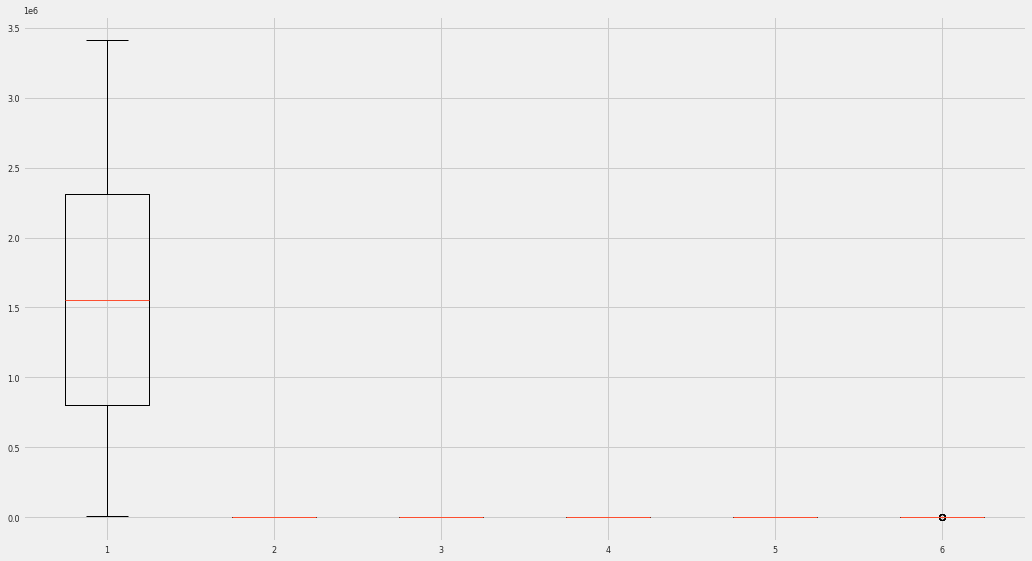

In [20]:
#BOXPLOT FOR OUTLIAR DETECTION ON TESTING DATA
a=dt_most_common_imputed['Weighted_amount']
b=dt_most_common_imputed['Fund_category']
c=dt_most_common_imputed['Geography']
d=dt_most_common_imputed['Lead_source']
e=dt_most_common_imputed['Level_of_meeting']
f=dt_most_common_imputed['Internal_rating']
to_plot=[a,b,c,d,e,f]
fig=plt.figure(1,figsize=(16,9))
ax=fig.add_subplot(111)
bp=ax.boxplot(to_plot)


In [21]:
#creating different dataframe for output 
df=pd.DataFrame()
df['Deal_title']=test['Deal_title']
df['Success_probability']=df_most_common_imputed['Success_probability']
df 


,Deal_title,Success_probability
0,TitleAD16O,73.6
1,TitleOW6CR,58.9
2,TitleVVJQ5,68.8
3,TitleUS8NA,64.5
4,Title5VGWW,62.4
...,...,...
2088,Title2R8VU,72.1
2089,Title7HCNJ,65.2
2090,TitleCD5YZ,65.9
2091,Title8OKXL,74.0


In [22]:
#Applying xgboost as it is too efficient
import xgboost as xgb
xg_reg = xgb.XGBRegressor( learning_rate = 0.101,
                max_depth =4,objective="reg:linear",alpha =1,n_estimators=9)
xg_reg.fit(x_train,y_train)
xgbost= xg_reg.predict(x_test)
df["Success_probability"]=xgbost
df.head()

[09:37:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Deal_title,Success_probability
0,TitleAD16O,37.436394
1,TitleOW6CR,40.982254
2,TitleVVJQ5,43.405239
3,TitleUS8NA,41.395451
4,Title5VGWW,42.260818


In [23]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [ .11, .12,.15,.17, 0.10], #so called `eta` value
              'max_depth': [4, 5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [9,7,8, 10]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

#xg_reg.fit(x_train,y_train)
#xgbost= xg_reg.predict(x_test)
#df["Success_probability"]=xgbost
#df.head()
xgb_grid.fit(x_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


Fitting 2 folds for each of 80 candidates, totalling 160 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    3.9s


-0.36677003346200054
{'colsample_bytree': 0.7, 'learning_rate': 0.17, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 10, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


[Parallel(n_jobs=5)]: Done 160 out of 160 | elapsed:    6.6s finished


In [24]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.17,
                max_depth = 4, alpha = 10, n_estimators = 10)
xg_reg.fit(x_train,y_train)
xgbost= xg_reg.predict(x_test)
df["Success_probability"]=xgbost
df.head()

[09:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Deal_title,Success_probability
0,TitleAD16O,51.718346
1,TitleOW6CR,56.783508
2,TitleVVJQ5,59.419674
3,TitleUS8NA,56.947220
4,Title5VGWW,57.865189


In [25]:
#output CSV
df.to_csv("/content/drive/MyDrive/Hack3/xg_boost12.csv", index=False)